In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('learningSet.csv')

C:\Users\sabba\AppData\Local\Temp\ipykernel_16536\1139992032.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('learningSet.csv')


In [3]:
# separating types
df_num=df.select_dtypes(np.number)
df_cat=df.select_dtypes(object)

In [4]:
df_cat.isna().sum()

OSOURCE       0
STATE         0
ZIP           0
MAILCODE      0
PVASTATE      0
           ... 
RFA_2A        0
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
GEOCODE2    132
Length: 74, dtype: int64

In [5]:
# replacing the empty values for Nan
df_cat = df_cat.apply(lambda x: x.replace(" ", np.NaN))

In [6]:
#Create a new empty list called drop_list

In [7]:
drop_list=[]

In [8]:
drop_list.append('OSOURCE')

In [9]:
drop_list=drop_list + ['ZIP']

In [10]:
drop_list

['OSOURCE', 'ZIP']

In [11]:
# Identify columns that over 85% missing values

In [12]:
nulls_percent_df = pd.DataFrame(df_cat.isna().sum()/len(df_cat)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].head(60)

,column_name,nulls_percentage
0,OSOURCE,0.009726
3,MAILCODE,0.985337
4,PVASTATE,0.984719
5,NOEXCH,0.000073
6,RECINHSE,0.929747
7,RECP3,0.978860
8,RECPGVG,0.998805
9,RECSWEEP,0.983052
11,DOMAIN,0.024274
12,CLUSTER,0.024274


In [13]:
# creating threshold


In [14]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.85]
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['MAILCODE', 'PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES']


In [15]:
df_cat.shape

(95412, 74)

In [16]:
drop_list=drop_list + (drop_columns_list)

In [17]:
# Remove those columns from the dataframe

In [18]:
# Filling Nans

In [19]:
display(df_cat['GENDER'].unique())
df_cat['GENDER']=df_cat['GENDER'].fillna('F')
display(df_cat['GENDER'].unique())

array(['F', 'M', nan, 'C', 'U', 'J', 'A'], dtype=object)

array(['F', 'M', 'C', 'U', 'J', 'A'], dtype=object)

In [20]:
# cleaning as requested
df_cat['GENDER'] = np.where(df_cat['GENDER'].isin(['F', 'M']), df_cat['GENDER'], 'other')


In [21]:
display(df_cat['GENDER'].unique())

array(['F', 'M', 'other'], dtype=object)

In [22]:
df_cat['CLUSTER']=df_cat['CLUSTER'].fillna('40')

In [23]:
df_cat['HOMEOWNR'] = df_cat['HOMEOWNR'].fillna('U')

In [24]:
# aggreating DOMAIN into two columns
df_cat['DOMAIN'] = df_cat['DOMAIN'].fillna('R2')

df_cat['DOMAIN_A'] = list(map(lambda x: x[0], df_cat['DOMAIN']))
df_cat['DOMAIN_B'] = list(map(lambda x: x[1], df_cat['DOMAIN']))

In [25]:
df_cat = df_cat.drop('DOMAIN', axis=1)

In [26]:
df_cat['DATASRCE'] = df_cat['DATASRCE'].fillna('0')
df_cat['GEOCODE2'] = df_cat['GEOCODE2'].fillna('A')

In [27]:
drop_list

['OSOURCE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES']

In [28]:
for col_name in df_cat.columns:
    if "RFA" in col_name:
        drop_list.append(col_name) 

In [29]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')


In [30]:
df_cat['VETERANS'].value_counts(dropna=False)

NaN    84986
Y      10426
Name: VETERANS, dtype: int64

In [31]:
# Veterans shoul not be on drop_list. Filling nulls with no.
df_cat['VETERANS']=df_cat['VETERANS'].fillna('N')

In [32]:
drop_list.remove('VETERANS')

In [33]:
df_cat['BIBLE'].value_counts(dropna=False)

NaN    86541
Y       8871
Name: BIBLE, dtype: int64

In [34]:
# Same as veterans, might prove usefull to use as a niche.
df_cat['BIBLE']=df_cat['BIBLE'].fillna('N')

In [35]:
drop_list.remove('BIBLE')

In [36]:
df_cat['HOMEE'].value_counts(dropna=False)
# not as usefull, mantain on drop_list

NaN    94525
Y        887
Name: HOMEE, dtype: int64

In [37]:
df_cat['MAJOR'].value_counts(dropna=False)

NaN    95118
X        294
Name: MAJOR, dtype: int64

In [38]:
# Even though 294 major donors suggest is a big outlier like that, it might be interesting to analyse in separate.
df_cat['MAJOR']=df_cat['MAJOR'].fillna('N')
df_cat['MAJOR']=df_cat['MAJOR'].str.replace('X','Y')
drop_list.remove('MAJOR')

In [39]:
# create a new column for just the major donors
df_cat['TOP_DONORS'] = df_cat['MAJOR'].apply(lambda x: 'Y' if x == 'Y' else None)


In [40]:
df_cat

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B,TOP_DONORS
0,GRI,IL,61081,NaN,NaN,0,NaN,NaN,NaN,NaN,...,S4E,L,E,X,X,X,C,T,2,None
1,BOA,CA,91326,NaN,NaN,0,NaN,NaN,NaN,NaN,...,F1E,L,G,X,X,X,A,S,1,None
2,AMH,NC,27017,NaN,NaN,0,NaN,NaN,NaN,NaN,...,S3D,L,E,X,X,X,C,R,2,None
3,BRY,CA,95953,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,L,E,X,X,X,C,R,2,None
4,NaN,FL,33176,NaN,NaN,0,X,X,NaN,NaN,...,A3D,L,F,X,X,X,A,S,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,L,G,X,X,X,C,C,2,None
95408,DCD,TX,77379,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,L,F,X,X,X,A,C,1,None
95409,MBC,MI,48910,NaN,NaN,0,NaN,X,NaN,NaN,...,NaN,L,E,X,X,X,B,C,3,None
95410,PRV,CA,91320,NaN,NaN,0,X,NaN,NaN,NaN,...,S3F,L,F,X,X,X,A,C,1,None


In [41]:
df_cat['RECINHSE'].value_counts(dropna=False)

NaN    88709
X       6703
Name: RECINHSE, dtype: int64

In [42]:
len(drop_list)

52

In [43]:
df_cat=df_cat.drop(columns=drop_list)

df_cat.shape

(95412, 24)

In [44]:
# it´s just 7, i´m just dropping it
df_cat['NOEXCH']=df_cat['NOEXCH'].dropna=True

In [45]:
df_cat['AGEFLAG'].value_counts(dropna=False)

E      57344
NaN    29548
I       8520
Name: AGEFLAG, dtype: int64

In [46]:
# fill with the most common 
df_cat['AGEFLAG'] = df_cat['AGEFLAG'].fillna('E')

In [47]:
df_cat['PETS'].value_counts(dropna=False)

NaN    81086
Y      14326
Name: PETS, dtype: int64

In [48]:
# It´s yes or no for household pets. It should be no the Nans
df_cat['PETS'] = df_cat['PETS'].fillna('N')

In [49]:
df_cat['LIFESRC'].value_counts(dropna=False)

NaN    54032
2      20027
3      11479
1       9874
Name: LIFESRC, dtype: int64

In [50]:
# `LIFESRC` | LIFE STYLE DATA SOURCE <br /> Indicates source of the lifestyle variables listed above <br /> 
# 1=MATCHED ON METRO MAIL ONLY <br /> 2=MATCHED ON POLK ONLY <br /> 3=MATCHED BOTH MM AND POLK
# It should be neither, thus fill with 0


In [51]:
df_cat['LIFESRC'] = df_cat['LIFESRC'].fillna(0)

In [52]:
df_cat['PEPSTRFL'].value_counts(dropna=False)

NaN    50143
X      45269
Name: PEPSTRFL, dtype: int64

In [53]:
# `PEPSTRFL` | Indicates PEP Star RFA Status <br /> blank=Not considered to be a PEP Star <br /> 'X'=Has PEP Star RFA Status
# nan should be does NOT have PEP star
df_cat['PEPSTRFL'] = df_cat['PEPSTRFL'].fillna('N')
# replace the X for Y to keep the standard
df_cat['PEPSTRFL']=df_cat['PEPSTRFL'].str.replace('X','Y')

In [54]:
df_cat['PEPSTRFL'].value_counts(dropna=False)

N    50143
Y    45269
Name: PEPSTRFL, dtype: int64

In [55]:
df_cat['GEOCODE'].value_counts(dropna=False)

NaN    80168
12      3914
3       3327
14      2017
5       1918
4       1622
2       1408
1       1038
Name: GEOCODE, dtype: int64

In [56]:
df_cat['GEOCODE'] = df_cat['GEOCODE'].fillna('Not assigned')

In [57]:
# Final check for nulls
df_cat.isna().sum()

STATE             0
NOEXCH            0
MDMAUD            0
CLUSTER           0
AGEFLAG           0
HOMEOWNR          0
GENDER            0
DATASRCE          0
MAJOR             0
GEOCODE           0
VETERANS          0
BIBLE             0
PETS              0
LIFESRC           0
PEPSTRFL          0
RFA_2R            0
RFA_2A            0
MDMAUD_R          0
MDMAUD_F          0
MDMAUD_A          0
GEOCODE2          0
DOMAIN_A          0
DOMAIN_B          0
TOP_DONORS    95118
dtype: int64

> All nulls cleaned and columns dropped for categoricals

## End of Lab 7.01

In [58]:
# Check for null values in the numerical columns and keeping the standard of dropping the columns with more then 85% nulls.

In [59]:
# Number of chil. if you look to it it has more than 85 % nulls, the percentage of no kids. I thought it is 
# better just to fill the NANs and keep the column because it can be relevant
df_num['NUMCHLD'].value_counts(dropna=False)

# filling with no kids = 0
df_num['NUMCHLD']=df_num['NUMCHLD'].fillna(0)

In [60]:
nulls_percent_df2 = pd.DataFrame(df_num.isna().sum()/len(df_num)).reset_index()
nulls_percent_df2.columns = ['column_name', 'nulls_percentage']
#nulls_percent_df2[nulls_percent_df2['nulls_percentage']!=0].head(60)
null_list=pd.DataFrame(df_num.isna().sum(), columns=['nulls'])
null_list[null_list['nulls']!=0].tail(50)

,nulls
ADATE_22,25648
ADATE_23,56270
ADATE_24,36973
RDATE_3,95170
RDATE_4,95131
RDATE_5,95403
RDATE_6,94636
RDATE_7,86517
RDATE_8,73940
RDATE_9,78678


In [61]:
df_num.shape

(95412, 407)

In [62]:
columns_above_threshold_2 = nulls_percent_df2[nulls_percent_df2['nulls_percentage']>0.85]
drop_columns_list_2 = list(columns_above_threshold_2['column_name'])
print(drop_columns_list_2)

['RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_10', 'RDATE_13', 'RDATE_15', 'RDATE_17', 'RDATE_20', 'RDATE_21', 'RDATE_23', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_10', 'RAMNT_13', 'RAMNT_15', 'RAMNT_17', 'RAMNT_20', 'RAMNT_21', 'RAMNT_23']


In [63]:
df_num=df_num.drop(columns=drop_columns_list_2)

In [64]:
df_num.shape

(95412, 383)

In [65]:
# `WEALTH1` | Wealth Rating

In [66]:
df_num['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [67]:
df_num['WEALTH2'].value_counts(dropna=False)

NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64

In [68]:
# both columns are the same. filling with the mean
#numerical['WEALTH1'] = numerical['WEALTH1'].astype('object')
df_num['WEALTH1'] = df_num['WEALTH1'].fillna(np.mean)
#numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')
df_num['WEALTH2'] = df_num['WEALTH2'].fillna(np.mean)

In [69]:
df_num.isna().sum()

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD         0
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 383, dtype: int64

In [70]:
df_num['AGE'].value_counts(dropna=False)

NaN     23665
50.0     1930
76.0     1885
72.0     1813
68.0     1809
        ...  
9.0         1
6.0         1
10.0        1
8.0         1
15.0        1
Name: AGE, Length: 97, dtype: int64

In [71]:
# filling with mean
df_num['AGE'] = df_num["AGE"].fillna(np.mean(df_num['AGE']))

In [72]:
# GEOCODE2 was done before. dealing with columns asked on the Lab.

In [73]:
df_num['ADI'].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [74]:
df_num['DMA'].value_counts(dropna=False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

In [75]:
 df_num['MSA'].value_counts(dropna=False)   

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [76]:
# grouping them columns to better inspect
df_num_sorted = df_num[['MSA', 'DMA', 'ADI']]


In [77]:
df_num_sorted

,MSA,DMA,ADI
0,0.0,682.0,177.0
1,4480.0,803.0,13.0
2,0.0,518.0,281.0
3,9340.0,862.0,67.0
4,5000.0,528.0,127.0
...,...,...,...
95407,380.0,743.0,0.0
95408,3360.0,618.0,201.0
95409,4040.0,551.0,61.0
95410,8735.0,803.0,13.0


C:\Users\sabba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


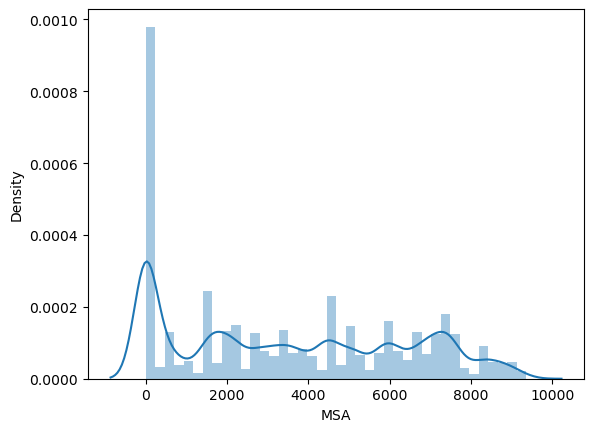

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.distplot(df_num[df_num['MSA'].isna()==False]['MSA']) 
plt.show()

In [79]:
# they all seem to follow the same pattern.
# Replacing all 0 values in MSA, DMA, and ADI columns with the corresponding column mean
for col in ['MSA', 'DMA', 'ADI']:
    df_num[col] = df_num[col].replace(0, df_num[col].mean())

In [80]:
 df_num['MSA'].value_counts(dropna=False)

3527.744102    21333
4480.000000     4606
1600.000000     4059
2160.000000     2586
520.000000      1685
               ...  
9140.000000        1
3200.000000        1
9280.000000        1
743.000000         1
8480.000000        1
Name: MSA, Length: 299, dtype: int64

C:\Users\sabba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


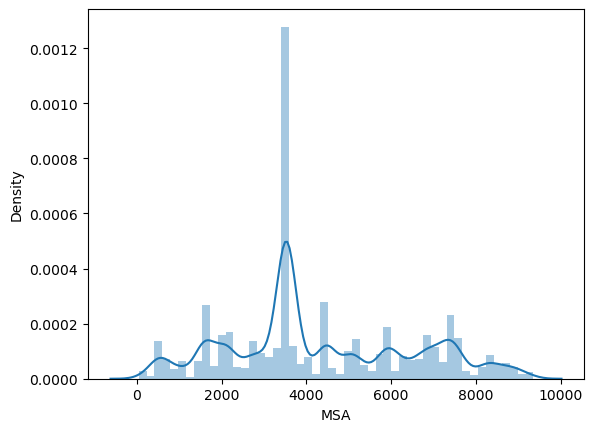

In [81]:
sns.distplot(df_num[df_num['MSA'].isna()==False]['MSA']) 
plt.show()

In [82]:
df_num_sorted.isna().sum()

MSA    132
DMA    132
ADI    132
dtype: int64

In [83]:
cols_to_clean = ['MSA', 'DMA', 'ADI']
df_num.dropna(subset=cols_to_clean, inplace=True)

In [84]:
# transform into categoricals at some point
#numerical.RFA_2F.value_counts()

In [85]:
# droping ADATE column
for col in df_num.columns:
    if 'ADATE' in col:
        df_num=df_num.drop(columns=col)

C:\Users\sabba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


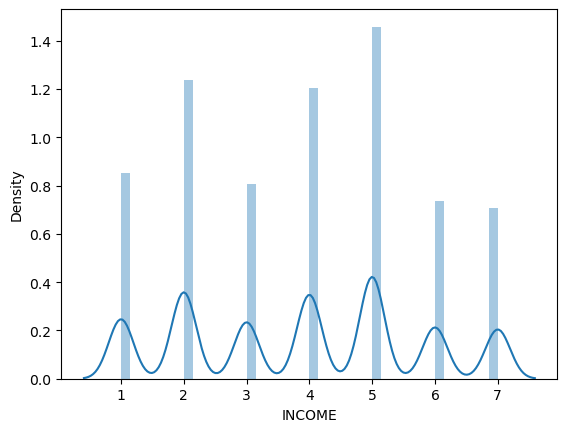

In [86]:
# column income
sns.distplot(df_num['INCOME']) 
plt.show()

In [87]:
print(df_num['INCOME'].value_counts(dropna=False))

NaN    21228
5.0    15429
2.0    13095
4.0    12722
1.0     9013
3.0     8553
6.0     7775
7.0     7465
Name: INCOME, dtype: int64


In [88]:
df_num['INCOME'] = df_num['INCOME'].astype(object)
df_num['INCOME'] = df_num['INCOME'].fillna(5.0)

C:\Users\sabba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


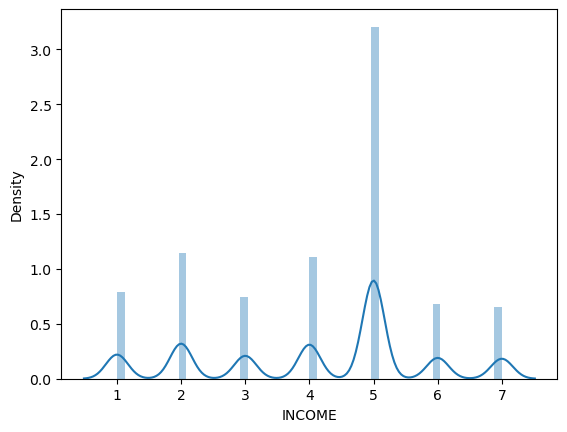

In [89]:
sns.distplot(df_num['INCOME']) 
plt.show()

C:\Users\sabba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


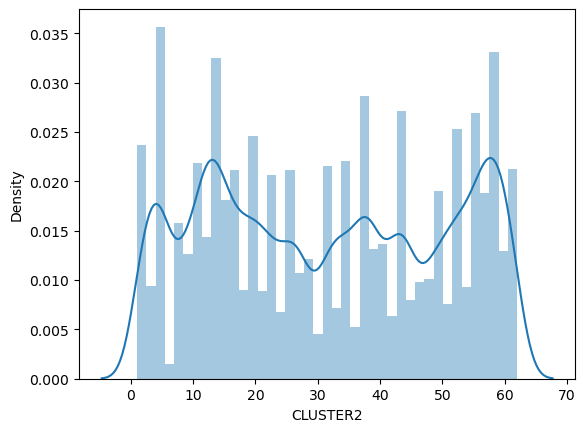

In [90]:
sns.distplot(df_num[df_num['CLUSTER2'].isna()==False]['CLUSTER2']) 
plt.show()

In [91]:
df_num['CLUSTER2'].value_counts(dropna=False)

13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
30.0     647
46.0     644
29.0     569
40.0     369
6.0      211
Name: CLUSTER2, Length: 62, dtype: int64

C:\Users\sabba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


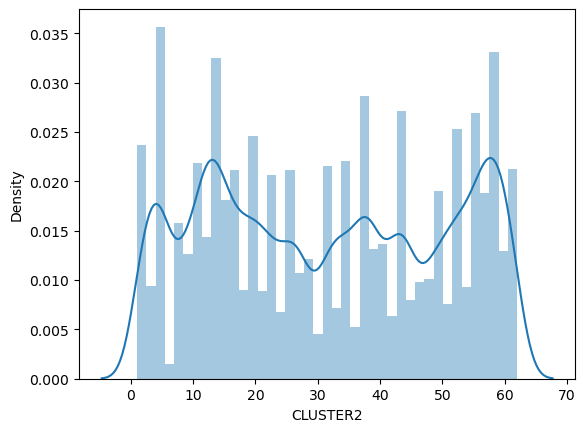

In [92]:

df_num['CLUSTER2'] = df_num['CLUSTER2'].fillna(np.ceil(np.mean(df_num['CLUSTER2'])))

sns.distplot(df_num['CLUSTER2']) 
plt.show()

In [93]:
df_num['CLUSTER2'].value_counts(dropna=False)

13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
30.0     647
46.0     644
29.0     569
40.0     369
6.0      211
Name: CLUSTER2, Length: 62, dtype: int64

In [94]:
# TIMELAG

In [95]:
timelag= int(np.mean(df_num[df_num['TIMELAG'] != np.NaN]['TIMELAG']))
timelag

8

In [96]:
def clean_timelag(x):
    if x > 30:
        return timelag
    else:
        return x

In [97]:
df_num['TIMELAG'].fillna(timelag, inplace=True)
df_num['TIMELAG'] = df_num['TIMELAG'].apply(clean_timelag)
df_num['TIMELAG'].isna().sum()

0

In [98]:
# RDATE

In [99]:
for col in df_num.columns:
    if 'RDATE' in col:
        df_num=df_num.drop(columns=[col])

In [100]:
# RAMNTs

In [101]:
df_num['RAMNT_8'].value_counts(dropna=False)

NaN      73839
15.00     3564
10.00     3384
20.00     3117
25.00     1834
         ...  
5.40         1
31.65        1
30.91        1
1.92         1
12.94        1
Name: RAMNT_8, Length: 109, dtype: int64

In [102]:
df_num['RAMNT_11'].value_counts(dropna=False)

NaN       80559
10.00      2697
15.00      2025
20.00      1894
5.00       1762
          ...  
101.00        1
77.00         1
140.00        1
34.68         1
200.00        1
Name: RAMNT_11, Length: 83, dtype: int64

In [103]:
# they are pretty much all the same. dropping all but the first one and then filling Nan with 0.
for x in df_num.columns:
    if x == 'RAMNT_8':
        pass
    elif 'RAMNT' in x:
        df_num=df_num.drop(columns=[x])

In [104]:
df_num['RAMNT_8'].fillna(0, inplace=True)

In [105]:
df_num['RAMNT_8'].isna().sum()

0

In [106]:
# NEXTDATE
df_num['NEXTDATE'].value_counts(dropna=False)

NaN       9961
9504.0    2251
9412.0    1968
8703.0    1956
9512.0    1866
          ... 
8107.0       1
7408.0       1
8207.0       1
8104.0       1
8412.0       1
Name: NEXTDATE, Length: 189, dtype: int64

In [107]:
# this column means it is a second time someone gives a second donation. The time it is not relevant, but giving a second
# time, yes. Creating a numerical boolean mask with 1 for second donation and 0 (the NaN fill) for no donation.
df_num['NEXTDATE']=df_num['NEXTDATE'].fillna(0)

In [108]:
df_num['NEXTDATE']=df_num['NEXTDATE'].apply(lambda x: x if x == 0 else 1)

In [109]:
df_num['NEXTDATE'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
95407    0.0
95408    0.0
95409    1.0
95410    1.0
95411    1.0
Name: NEXTDATE, Length: 95280, dtype: float64>

In [110]:
# hobbylist are useless and its cleaning way faster thanks to Giancarlo pinting out. So here we go

In [111]:
hobbylist= ['MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP']

In [112]:
df_num=df_num.drop(columns=hobbylist)

In [113]:
#checking nulls
df_num.isna().sum()[df_num.isna().sum() != 0]


Series([], dtype: int64)

In [114]:
# boom!

In [115]:
# concat
df_final=pd.concat([df_cat, df_num], axis=1)

In [116]:
Y = df[['TARGET_B', 'TARGET_D']]

In [117]:
df_cat.to_csv('categorical7_02.csv')
df_num.to_csv('numerical7_02.csv')
Y.to_csv('target7_02.csv')
df_final.to_csv('healthcare_clean.csv')